# パターン認識 第一週目 レポート課題

## レポートについて
＊レポートは配布資料(パターン認識_第1週目_資料.pdf)の「レポートの構成」にしたがってまとめてください。<br>
＊提出物は**レポート**と**課題を実装したjupyter notebookファイル(このファイル)**の二つです。

## レポート課題
課題の解をこのファイル(week1_report.ipynb)に実装してください。<br>課題ファイルにはコメント文でヒントが書かれていますが、**必ずしもヒント通りに解く必要はありません**（自由に実装していただいて構いません）。

この課題ではdataフォルダ内のreserve.csv、customer.csv、hotel.csvを使用します。<br>
reserve.csvをreserve_tbに、customer.csvをcustomer_tbに、hotel_csvをhotel_tbにDataframeとして読み込んで使用してください。


In [2]:
#ライブラリのインポート
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

In [3]:
#データの読み込み
reserve_tb = pd.read_csv('./data/reserve.csv', encoding = 'UTF-8')
hotel_tb = pd.read_csv('./data/hotel.csv', encoding = 'UTF-8')
customer_tb = pd.read_csv('./data/customer.csv', encoding = 'UTF-8')

### 課題1
大エリア(big_area_name)がAもしくはBに属するビジネスホテルを、基本料金(base_price)が高い順に並べ、TOP10をホテルID、順位、基本料金がわかるように表示してください。<br>
同率順位の場合の順位のつけ方は問いません。

In [5]:
#hotel_tbから大エリア名がA,Bのホテルを抽出し、hotel_AB_tbという変数に代入する
hotel_AB_tb=hotel_tb.query('big_area_name == "A" or big_area_name == "B"')

#hotel_AB_tbからビジネスホテル(is_businessがTrueのホテル)を抽出
hotel_AB_bus_tb=hotel_AB_tb.query('is_business == True')

#地価が高い順にランキングをつけて、hotel_AB_bus_tbにrankという列で追加
hotel_AB_bus_tb['rank']=hotel_AB_bus_tb['base_price'].rank(ascending=False,method='min')

#rank順にデータを昇順ソート。ソートした結果をresultという変数に代入。
result=hotel_AB_bus_tb.sort_values('rank',ascending=True).reset_index()

#TOP10の表示
result.head(10)

C:\Users\uiro_\AppData\Local\Temp\ipykernel_11572\1612018160.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_AB_bus_tb['rank']=hotel_AB_bus_tb['base_price'].rank(ascending=False,method='min')


,index,hotel_id,base_price,big_area_name,small_area_name,hotel_latitude,hotel_longitude,is_business,rank
0,268,h_269,67600,A,A-3,35.815809,139.937240,True,1.0
1,192,h_193,58500,B,B-3,35.641363,139.594342,True,2.0
2,194,h_195,50200,A,A-3,35.909876,139.934702,True,3.0
3,5,h_6,49500,A,A-3,35.912764,139.731281,True,4.0
4,272,h_273,44900,A,A-3,35.809547,139.940654,True,5.0
5,160,h_161,44600,A,A-1,35.716076,139.839687,True,6.0
6,275,h_276,39500,B,B-1,35.437891,139.595387,True,7.0
7,79,h_80,36700,B,B-1,35.439007,139.695035,True,8.0
8,242,h_243,27700,A,A-1,35.712357,139.939032,True,9.0
9,1,h_2,26400,A,A-1,35.715320,139.939446,True,10.0


# 課題2
customer_tbから顧客情報をランダムに1行抽出する。抽出した顧客の家と顧客が訪れたことのあるホテルの「距離」を計算し、その平均を表示してください。表示は平均とcustomer_idが分かるように表示してください。

ここで「距離」とは、横軸を経度、縦軸を緯度とした二次元平面上の2点間のユークリッド距離とします。つまり、顧客Aの家が(経度,緯度)=(120,30)、ホテルBが(経度,緯度)=(123,34)であるとき、その「距離」は<br>
<center>
$\sqrt{(120-123)^2+(30-34)^2}=5$
</center>
<br>
です。

In [20]:
#customer_tbからランダムに1行抽出し、targetという変数に代入する
target=customer_tb.sample(n=1)

#reserve_tbとtargetをcustomer_idに着目して結合し、merge_rc_tbという変数に代入する
merge_rc_tb=pd.merge(reserve_tb,target,on='customer_id',how='inner')

#targetが訪れたことのあるホテルを抽出する
#merge_rc_tbとhotel_tbをhotel_idに着目して結合し、merge_cus_tbという変数に代入する
merge_cus_tb=pd.merge(merge_rc_tb,hotel_tb,on='hotel_id',how='inner')

#家からホテルまでの距離を計算し、merge_cus_tbにdistanceという列で追加
merge_cus_tb['distance']=((merge_cus_tb['home_latitude']-merge_cus_tb['hotel_latitude'])**2 + (merge_cus_tb['home_longitude']-merge_cus_tb['hotel_longitude'])**2)**0.5

#mean関数でホテルの距離の平均を求め、distance_avgとして追加
result=target
result['distance_avg']=merge_cus_tb['distance'].mean()

#結果の表示
result.fillna(0, inplace=True)
result

,customer_id,age,sex,home_latitude,home_longitude,distance_avg
938,c_939,60,woman,33.280107,130.295499,10.503535


### 課題 3.A
大エリアEに属するホテルについて、緯度(hotel_latitude)・経度(hotel_longitude)を利用して*小エリア*(small_area_name)を分類する規則を自身で作成する。<br>
作成した規則に基づいてホテルを分類し、その結果と実際の小エリアを比較してその精度を求めてください。<br>レポートには、作成した規則とその精度がわかるように記載してください。<br>
規則の例）緯度が30度以上ならE-1、経度が130度未満であればE-3など

### 課題 3.B
どの小エリアに属しているか分かっていないホテルの小エリアを特定したいとします。<br>
ホテルの小エリアを正しく分類する確率を上げるには、課題3.Aで自身で作った規則をどのように改善できるか考察して下さい。<br>

**---------------以下課題 3.Aの実装---------------**

In [9]:
#hotel_tbから大エリアがEのホテルを抽出し、hotel_E_tbという変数に代入する
hotel_E_tb=hotel_tb.query('big_area_name=="E"')

<Axes: xlabel='hotel_longitude', ylabel='hotel_latitude'>

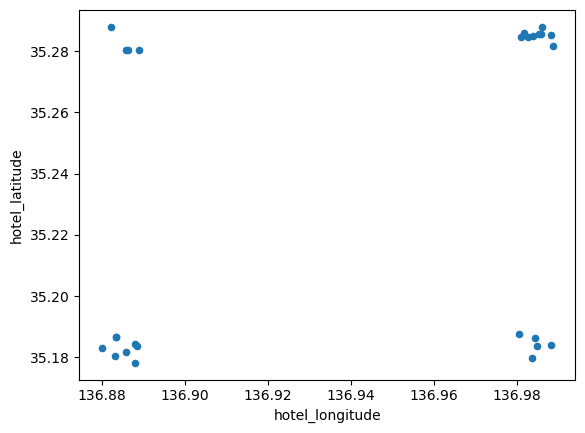

In [10]:
#hotel_E_tbに含まれるホテルの位置をプロットして確認
hotel_E_tb.plot(x='hotel_longitude', y='hotel_latitude', kind='scatter')

In [11]:
#小エリアごとに緯度・経度の最大値・最小値を求める
hotel_E_tb.groupby('small_area_name') .agg({'hotel_latitude': ['max', 'min'],'hotel_longitude': ['max', 'min']}).reset_index()

small_area_name hotel_latitude            hotel_longitude            
                             max        min             max         min
0             E-1      35.186821  35.178252      136.888370  136.879920
1             E-2      35.187624  35.179864      136.988028  136.980493
2             E-3      35.287875  35.280275      136.888799  136.882181
3             E-4      35.287915  35.281572      136.988565  136.980869

In [17]:
#ルールの作成
def rule(x, y):
    if x < 136.94:
        if y < 35.24:
            return "E-1"
        else:
            return "E-3"
    else:
        if y < 35.24:
            return "E-2"
        else:
            return "E-4"

In [18]:
#作成したルールにしたがってホテルを分類し、分類結果をhotel_E_tbに付与
small_area_class = list(map(rule, hotel_E_tb['hotel_longitude'],hotel_E_tb['hotel_latitude']))
hotel_E_tb['small_area_class'] = small_area_class
hotel_E_tb

C:\Users\uiro_\AppData\Local\Temp\ipykernel_11572\3404818137.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_E_tb['small_area_class'] = small_area_class


,hotel_id,base_price,big_area_name,small_area_name,hotel_latitude,hotel_longitude,is_business,small_area_class
2,h_3,41300,E,E-4,35.281572,136.988565,False,E-4
14,h_15,4300,E,E-4,35.284697,136.980869,False,E-4
16,h_17,20400,E,E-3,35.280275,136.885623,False,E-3
20,h_21,11200,E,E-1,35.178252,136.887891,False,E-1
23,h_24,4600,E,E-1,35.186821,136.883244,True,E-1
32,h_33,7500,E,E-4,35.287915,136.985895,False,E-4
38,h_39,5000,E,E-2,35.183623,136.984822,False,E-2
53,h_54,12800,E,E-2,35.186433,136.984196,False,E-2
61,h_62,46800,E,E-3,35.280362,136.886283,True,E-3
65,h_66,34600,E,E-1,35.183890,136.888370,False,E-1


In [19]:
#分類の精度を調べる
#accuracy_scoreを使用するためにndarray型の変数にする
big_area_true = hotel_E_tb['small_area_name'].to_numpy()
big_area_pred = hotel_E_tb['small_area_class'].to_numpy()

# scikit-learn で計算する
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(big_area_true, big_area_pred)
#精度の表示
print(accuracy)

1.0
